## 노이즈 유형

In [ ]:
# 노이즈 유형 1 : 문장부호가 있는 경우
# 문장 부호 양쪽에 공백을 추가하는 방법으로 해결
def pad_punctuation(sentence, punc):

  for p in punc:
    sentence = sentence.replace(p, " "+ p + " ")

  return sentence

In [ ]:
sentence = "Hi, my name is john."

print(pad_punctuation(sentence, [".", "?", "!", ","]))

Hi ,  my name is john . 


In [ ]:
# 노이즈 유형 2
# 소문자로 변경

sentence = "First, open the first chapter."
print(sentence.lower())

first, open the first chapter.


In [ ]:
# 노이즈 유형 2-1
## 대문자로 변경

sentence = "First, open the first chapter."
print(sentence.upper())

FIRST, OPEN THE FIRST CHAPTER.


In [ ]:
import re

# 노이즈 유형 3
# 문자를 제외하고, 특수문자 등이 공백으로 변경하여 처리한다.
sentence = "He is a ten-year-old boy."
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)

print(sentence)

He is a ten year old boy.


In [ ]:
corpus = \
"""
"The Frost King," which I wrote and sent to Mr. Anagnos, of the Perkins Institution for the Blind, was at the root of the trouble. In order to make the matter clear, I must set forth the facts connected with this episode, which justice to my teacher and to myself compels me to relate.
"""

In [ ]:
def cleaning_text(text, punc, regex):
    # 노이즈 유형 1
    for p in punc:
        text = text.replace(p, " "+ p + " ")

    # 노이즈 유형 2
    text= text.lower()

    # 노이즈 유형 3
    text = re.sub(regex, " ", text)
    
    return text

In [ ]:
print(cleaning_text(corpus, [".", "?", "!", ","], "[^a-zA-Z.,?!\n]"))


 the frost king ,   which i wrote and sent to mr .  anagnos ,  of the perkins institution for the blind ,  was at the root of the trouble .  in order to make the matter clear ,  i must set forth the facts connected with this episode ,  which justice to my teacher and to myself compels me to relate . 



Label(라벨링)
1. Sentence -> Class로 변경
    TSV(Tab 구분 파일 확장자) 형태의 하나의 파일로 구성

    - 각 row가 문장과 대응된다.

    나는 영화가 좋다 -> 1

    나는 영화가 싫다 -> 0

2. Sentence -> Sentence
    다른 언어 문장을 다른 언어 문장으로 대응
    
    나는 영화가 좋다. -> I Love movies 

# 토큰화

## 공백기반 토큰화

`"그녀는 나와 밥을 먹는다"` 라는 문장이 주어지면 공백 기준으로 나눈다고 가정해보자 

1.    `1: 그녀는` `2: 나와` `3: 밥을` `4: 먹는다` 4개 단어
2.   `1: 그녀` `2: 는` `3: 나` `4: 와` `5: 밥` `6: 을` `7: 먹는다` 잘개 쪼개어 7개 단어

그것은 우리가 정의할 **토큰화 기법이 결정할 부분**! 

문장을 어떤 기준으로 쪼개었을 때, 쪼개진 각 단어들을 **토큰(Token)** 이라고 부릅니다. 그리고 그 쪼개진 기준이 **토큰화(Tokenization) 기법**에 의해 정해지죠. 이번 스텝에서는 토큰화의 여러 가지 기법에 대해 배워보도록 하겠습니다.

 자연어의 노이즈를 제거하는 방법 중 하나로 우리는 `Hi,` 를 `Hi`와  `,`로 나누기 위해 문장부호 양옆에 공백을 추가해 주었습니다. 그것은 이 **공백 기반 토큰화**를 사용하기 위해서였죠! 당시의 예제 코드를 다시 가져와 공백을 기반으로 토큰화를 진행해 보겠습니다.

In [ ]:
corpus = \
"""
 the frost king ,   which i wrote and sent to mr .  anagnos ,  of the perkins institution for the blind ,  was at the root of the trouble .  in order to make the matter clear ,  i must set forth the facts connected with this episode ,  which justice to my teacher and to myself
"""

# HINT : split()을 사용하여 공백토큰화를 수행하세요.
tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

문장이 포함하는 Tokens: ['the', 'frost', 'king', ',', 'which', 'i', 'wrote', 'and', 'sent', 'to', 'mr', '.', 'anagnos', ',', 'of', 'the', 'perkins', 'institution', 'for', 'the', 'blind', ',', 'was', 'at', 'the', 'root', 'of', 'the', 'trouble', '.', 'in', 'order', 'to', 'make', 'the', 'matter', 'clear', ',', 'i', 'must', 'set', 'forth', 'the', 'facts', 'connected', 'with', 'this', 'episode', ',', 'which', 'justice', 'to', 'my', 'teacher', 'and', 'to', 'myself']


## 형태소 기반 토큰화

하지만 우리에겐 영어 문장이 아닌 한국어 문장을 처리할 일이 더 많을 것이고, 한국어 문장은 **공백 기준**으로 토큰화를 했다간 **엉망진창의 단어들이 등장하는 것**을 알 수 있습니다. 문장부호처럼 **"은 / 는 / 이 / 가"**  양옆에 공백을 붙이자구요? 글쎄요... 가로 시작하는 단어만 해도 가면, 가위, 가족, 가수... 의도치 않은 변형이 너무나도 많이 일어날 것 같네요!

이를 어떻게 해결할 수 있을까요? 정답은 **형태소**에 있습니다. 어릴 적 국어 시간에 배운 기억이 새록새록 나시나요? 상기시켜드리면 형태소의 정의는 아래와 같습니다.

*(명사)  뜻을 가진 가장 작은 말의 단위.*

예를 들어, `오늘도 공부만 한다`  라는 문장이 있다면, `오늘`, `도`, `공부`, `만`, `한다` 로 쪼개지는 것이 바로 형태소죠. 한국어는 이를 활용해 토큰화를 할 수 있습니다!

한국어 형태소 분석기는 대표적으로 아래 두 가지가 사용됩니다.
- KoNLPy 파이썬 한국어 패키지
- kakao/khaiii

KoNLPy는 내부적으로 5가지의 형태소 분석 Class를 포함하고 있습니다. Khaiii까지 총 6개나 되는 형태소 분석기들은 **특수한 문장(띄어쓰기 X / 오탈자) 처리 성능, 속도** 측면에서 **차이**를 보입니다. 천하무적인 것은 (아직은) 없으니, 각 분석기를 직접 테스트해보고 적합한 것을 선택해 사용하면 됩니다.

### Colab에서 mecab설치하기

```
local에서 mecab 설치
$ pip install konlpy
$ pip install eunjeon
- from eunjeon import Mecab
- mecab = Mecab()
```

In [15]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 50.9 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 3.39 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-17 00:38:13--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# None자리에 문장을 넣어보고 토큰화 결과를 출력해보세요.

# 예시문장 : 자연어처리가너무재밌어서밥먹는것도가끔까먹어요
corpus_en = \
"""
 the frost king ,   which i wrote and sent to mr .  anagnos ,  of the perkins institution for the blind ,  was at the root of the trouble .  in order to make the matter clear ,  i must set forth the facts connected with this episode ,  which justice to my teacher and to myself
"""
corpus_ko = "자연어처리가너무재밌어서밥먹는것도가끔까먹어요"
print(mecab.morphs(corpus_en))
print(mecab.morphs(corpus_ko))

['the', 'frost', 'king', ',', 'which', 'i', 'wrote', 'and', 'sent', 'to', 'mr', '.', 'anagnos', ',', 'of', 'the', 'perkins', 'institution', 'for', 'the', 'blind', ',', 'was', 'at', 'the', 'root', 'of', 'the', 'trouble', '.', 'in', 'order', 'to', 'make', 'the', 'matter', 'clear', ',', 'i', 'must', 'set', 'forth', 'the', 'facts', 'connected', 'with', 'this', 'episode', ',', 'which', 'justice', 'to', 'my', 'teacher', 'and', 'to', 'myself']
['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [ ]:
# 5개의 분석기의 결과를 확인해본다.
# Hannanum, Kkma, Komoran, Mecab, Okt 중 어떤 것이 더 뛰어난가?
# morphs 형태소 분석
from konlpy.tag import Hannanum, Kkma, Komoran, Mecab, Okt
okt = Okt()
sentence = '자연어처리가너무재밌어서밥먹는것도가끔까먹어요'
okt.morphs(sentence)

tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt()]

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.morphs(sentence)))

[Hannanum] 
['자연어처리가너무재밌어서밥먹는것도가끔까먹어요']
[Kkma] 
['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']
[Komoran] 
['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']
[Mecab] 
['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']
[Okt] 
['자연어', '처리', '가', '너무', '재밌어서', '밥', '먹는것도', '가끔', '까먹어요']


In [ ]:
# 5개의 분석기의 결과를 확인해본다.
# Hannanum, Kkma, Komoran, Mecab, Okt 중 어떤 것이 더 뛰어난가? mecab, okt가 괜찮다.
# pos : 품사 추출
# nouns 명사 추출
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'
print("품사 구분")
for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)))

print("명사 구분")
for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.nouns(kor_text)))

품사 구분
[Hannanum] 
[('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
[Kkma] 
[('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'NNM'), ('중국', 'NNG'), ('우', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('에', 'VV'), ('서', 'ECD'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKM'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), (',', 'SP'), ('새', 'NNG'), ('롭', 'XSA'), ('ㄴ', 'ETD'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
[Komoran] 
[('코로나바이러스', 'NNP'), ('는', 'JX'), ('2019'

# 인코딩

## 단어 기반 인코딩

- Tokenizer(num_words = 100) : num_words를 단어 빈도수가 높은 순으로 100개만 사용한다는 의미이다. 나머지는 고려하지 않는다.
- fit_on_texts : 문자 데이터를 입력받아서 리스트의 형태로 변환
- word_index : tokenizer의 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환한다. 이때, 반환 시 자동으로 소문자로 변환되어 들어간다. 그리고 느낌표나 마침표 같은 구두점은 자동으로 제거된다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
]

tokenizer = Tokenizer(num_words = 100) 
tokenizer.fit_on_texts(sentences) # 문자 데이터를 입력받아서 리스트의 형태로 변환

# 토큰별 단어에 index를 매핑시켜준다. 딱 빈도 수 높은 순으로 100개까지 저장 가능
word_index = tokenizer.word_index 
print(word_index)

# 결과:리스트 형태로 변환이 된다.
# {'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


## 텍스트를 시퀀스로 변환하기

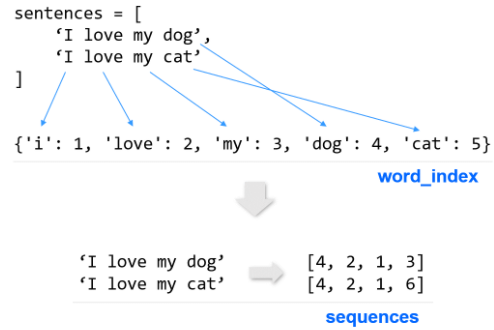

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

# {'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

# 지금까지 토큰으로 나눠진 숫자로 표기했다. 그다음은 그 숫자를 나열하여 문장를 표현한다.
# 시퀀스 표현 : [[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]
sequences = tokenizer.texts_to_sequences(sentences) # 텍스트를 시퀀스로 변환

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


## 패딩설정하기

행렬의 길이를 맞춰야 한다.
행렬의 길이를 늘릴 때, 0으로 채워준다.

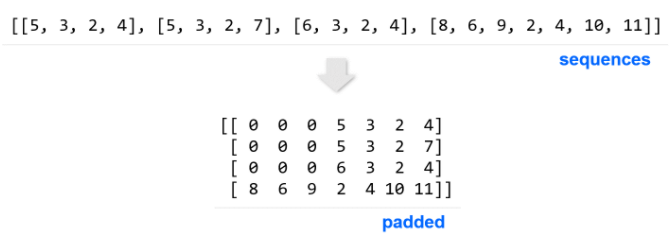

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?',
  'dk023 1231 hi hello!',
  '안녕하세요? 저는 정상택입니다.'
]

# 만일 단어장에 없다면, OOV (Out-Of-Vocabulary)로 표기
# OOV가 잘 나오게 하려면 num_words를 팍 줄이면 된다. ex) num_words = 3
# 단어장의 개수가 3이 되면, 3개의 단어외에는 모두 OOV로 표시된다.
# 이는 num_words 초과된 단어를 허용하지 않기 때문이다.
# 단어장이 너무 많이 되어, 메모리가 모자를 수 있기 때문에 적절한 범위를 설정해야 한다.
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11, 'dk023': 12, '1231': 13, 'hi': 14, 'hello': 15, '안녕하세요': 16, '저는': 17, '정상택입니다': 18}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11], [12, 13, 14, 15], [16, 17, 18]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]
 [ 0  0  0 12 13 14 15]
 [ 0  0  0  0 16 17 18]]


In [ ]:
# 연습

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?',
  '안녕하세요? 저는 정상택입니다.',
  """\
  Basic 에서는 방법을 몰라도 누구나 따라할 수 있도록 코드를 제공해드립니다! 입문자의 눈높이에 맞춰 데이터 분석 Baseline 코드를 매주 월요일 1개씩, 총 2회 제공합니다.
  """
]

# 만일 단어장에 없다면, OOV (Out-Of-Vocabulary)로 표기
# OOV가 잘 나오게 하려면 num_words를 팍 줄이면 된다. ex) num_words = 3
# 단어장의 개수가 3이 되면, 3개의 단어외에는 모두 OOV로 표시된다.
# 이는 num_words 초과된 단어를 허용하지 않기 때문이다.
# 단어장이 너무 많이 되어, 메모리가 모자를 수 있기 때문에 적절한 범위를 설정해야 한다.
tokenizer = Tokenizer(num_words = 30, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

print(word_index)
print(sequences)
print(padded)
print("")
# oov_token 없이 테스트
# oov_token 지정을 하지 않으면, 단어장에 없는 단어는 가장 빈도수 많은 단어로 채워버린다.
tokenizer = Tokenizer(num_words = 30)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, '코드를': 7, 'cat': 8, 'do': 9, 'think': 10, 'is': 11, 'amazing': 12, '안녕하세요': 13, '저는': 14, '정상택입니다': 15, 'basic': 16, '에서는': 17, '방법을': 18, '몰라도': 19, '누구나': 20, '따라할': 21, '수': 22, '있도록': 23, '제공해드립니다': 24, '입문자의': 25, '눈높이에': 26, '맞춰': 27, '데이터': 28, '분석': 29, 'baseline': 30, '매주': 31, '월요일': 32, '1개씩': 33, '총': 34, '2회': 35, '제공합니다': 36}
[[5, 3, 2, 4], [5, 3, 2, 8], [6, 3, 2, 4], [9, 6, 10, 2, 4, 11, 12], [13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23, 7, 24, 25, 26, 27, 28, 29, 1, 7, 1, 1, 1, 1, 1, 1]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  3  2  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  3  2  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  3  2  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  6 10  2  4 11 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13 14 15]
 [16 17 18 19 20 21 22 23  7 24 25 26 27 28 29  1  7  1  1  1  1  1  

In [ ]:
# 한국어-영어 코퍼스 (실제 데이터)로 토큰화 수행하기


In [17]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [18]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

--2022-05-17 00:44:03--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-05-17 00:44:03--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean-eng

In [19]:
!tar -xzf korean-english-park.train.tar.gz

In [20]:
path_to_file = './korean-english-park.train.ko'
with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

# data size 확인
print("Data Size: ", len(raw))

Data Size:  94123


In [21]:
print("Examples : ")
for sen in raw[0:100][::20]: print(">>", sen)

Examples : 
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [22]:
# 문장 길이의 분포를 확인
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length:
        min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 편균 길이 : ', sum_len/len(raw))

문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 편균 길이 :  60.78048935966767


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


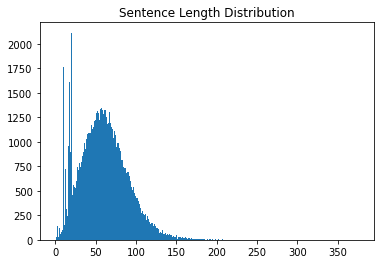

In [23]:
# 분포도 확인
sentence_length = np.zeros((max_len), dtype=np.int)
for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribution')
plt.show()

In [24]:
def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

In [ ]:
# ’기호는 문장이 아니기 때문에 나중에 제거해야 한다.
check_sentence_with_length(raw, 1)

’


In [25]:
for idx, _sum in enumerate(sentence_length):
    if _sum > 1500:
        print("Outlier index : ", idx+1)

Outlier index :  11
Outlier index :  19
Outlier index :  21


In [26]:
# 결과 : 중복된 문장이 많다.
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [27]:
# 최종본 문장 길이의 분포를 확인
min_len = 999
max_len = 0
sum_len = 0

# set : 중복을 제거해준다.
cleaned_corpus = list(set(raw))
print("data size : ", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length:
        min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 편균 길이 : ', sum_len/len(cleaned_corpus))

data size :  77591
문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 편균 길이 :  64.53810364604142


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


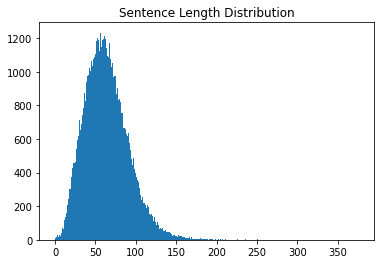

In [ ]:
# 분포도 다시 확인
sentence_length = np.zeros((max_len), dtype=np.int)
for sen in cleaned_corpus:
    sentence_length[len(sen)-1] +=1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


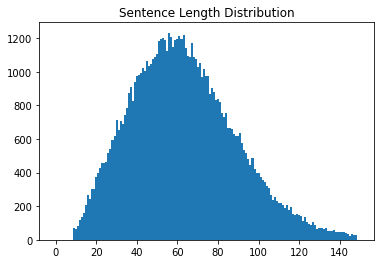

In [30]:
# 분포도에서 150이 대강 경계선이므로, 150으로 잘라준다.
min_len = 10
max_len = 150

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 공백 기반 토큰화

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize(corpus):
    # Tokenizer(,,,) : tensorflow에 필요한 token을 생성하며, 옵션이 여러가지 있다.
    # num_words : 단어 빈도가 많은 순서대로 num_words개의 단어를 보존한다.
    # filter : 걸러낼 문자 리스트 적어준다. 디폴트 : !"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n
    # lower : 소문자를 변환할지 Ture, False
    # split : 단어를 분리하는 기준을 적어줌
    # char_level : True인 경우 모든 문자가 토큰으로 처리가 된다.
    # oov_token : <OOV> <UNK>값이 지정된 경우, text_sequence호출과정에서 word_index추가되어서 out_of vovabulary words 대체
    #tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
    tokenizer = Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    sequences = tokenizer.texts_to_sequences(corpus)
    # padding을 하지 않으면 데이터 편향성이 생긴다.
    # post 옵션은 0을 뒤에 붙이는데, pre가 약간 성능이 좋을 수 있다.
    # 다만 개발자들은 post를 사용하는데, 취향 차이라고 한다.
    tensor = pad_sequences(sequences, padding='post')

    # tensor는 sequence를 의미.
    return tensor, tokenizer

In [31]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해보세요.
# 의미 : 사실 tokenizer만 사용해도 토큰화가 가능하지만,여기에서 더 split으로 잘라주었다
# split된 corpus를 tokenize 함수에서 더 잘게 잘라준다.
# 이러면 공백기반으로 토큰화가 된다.
# split 없이 하면 tensorflow화된 토큰화가 되어, word_index가 약간 달라진다.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

print(len(split_corpus))

76908


In [32]:
split_tensor, split_tokenizer = tokenize(split_corpus)
print("Split Vocab Size :", len(split_tokenizer.index_word)) 

# Split Vocab Size : 237436로 나온다.
# 공백을 제거한 split된 단어는 모두 237436으로 나온다.

Split Vocab Size : 237435


In [33]:
for i in range(0, 10):
    print(split_tensor[i])

[ 3450   999    29 52450 83715  2412 83716 38516 83717   220 83718  3270
 38517  2955 30597 30598 19019 19020     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[ 7072  2134  1302     9   335   430 25365  2080  4837   118    51 38518
 38519  7442 83719     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[  150 83720  1544  1426  1923 83721 83722 83723 38520  7443 21683 83724
  1899 83725 52451 52452   400 38521  8860 25366    63     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[25367 83726 13839 10852  1831 83727   670  3451 38522  3039  5919    19
     2     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[    7     1   917 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


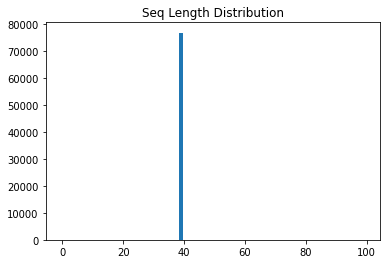

In [34]:
# padding된 sequence로는 분포를 알 수 없다.
min_len = 0
max_len = 100

seq_length = np.zeros((max_len), dtype=np.int)

for seq in split_tensor:
    seq_length[len(seq)-1] += 1

plt.bar(range(max_len), seq_length, width=1.0)
plt.title("Seq Length Distribution")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


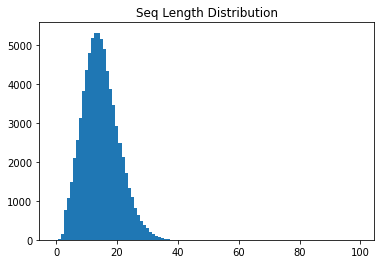

In [35]:
# set으로 중복을 제거하고 확인해본다.
min_len = 0
max_len = 100

seq_length = np.zeros((max_len), dtype=np.int)

for seq in split_tensor:
    seq_length[len(set(seq))-1] += 1

plt.bar(range(max_len), seq_length, width=1.0)
plt.title("Seq Length Distribution")
plt.show()

In [36]:
# 1: 밝혔다. -> 밝 + 혔다.로 형태소 토큰으로 변경되어야 한다.
# 공백 토큰의 단점이 한글에서 나오게 된다.
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 30: break


0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번
12 : 한
13 : 대해
14 : 것으로
15 : 전
16 : 것이라고
17 : 미국
18 : 있다고
19 : 것을
20 : 중
21 : 미
22 : 그러나
23 : 다른
24 : 더
25 : 이라크
26 : 한편
27 : 많은
28 : 통해
29 : 위한
30 : 대통령은
31 : 가장


형태소 토큰화

In [51]:
# 위에서 사용한 코드를 활용해 Mecab단어 사전을 만들어주세요.
# Hint : mecab.morphs() --> 형태소 분석 수행
from konlpy.tag import Mecab # from eunjeon import Mecab 

def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    # 코드 작성
    mecab_corpus.append(mecab_split(kor))

In [50]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("Mecab Vocab Size :", len(mecab_tokenizer.index_word))

# 공백 토큰화보다 더 적은 vocab을 얻을 수 있다. 한글에서의 형태소 분류의 장점이다.

Mecab Vocab Size : 47792


In [52]:
for idx, word in enumerate(mecab_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 30: break

0 : .
1 : 다
2 : 이
3 : 는
4 : 을
5 : 의
6 : 은
7 : 에
8 : 를
9 : 했
10 : 하
11 : 고
12 : 있
13 : 들
14 : 가
15 : 에서
16 : 한
17 : ,
18 : 것
19 : 으로
20 : 로
21 : 다고
22 : 과
23 : “
24 : ”
25 : 인
26 : 일
27 : 그
28 : 명
29 : )
30 : (
31 : 지


In [40]:
# set으로 중복을 제거하고 확인해본다.
min_len = 0
max_len = 100

seq_length = np.zeros((max_len), dtype=np.int)

for seq in mecab_tensor:
    seq_length[len(set(seq))-1] += 1

plt.bar(range(max_len), seq_length, width=1.0)
plt.title("Seq Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


NameError: ignored

In [ ]:
# 1. 한국어에서 공백토큰화를 쓰는 문제점은?
# 	-> 한국어는 어근과 조사가 공백으로 분명하게 나타나지 않아서, 분리하기 힘들다.
# 2. 패딩을 쓰는 이유는?
# 	-> 데이터 편향화를 막기 위해서 각 길이를 맞춰준다.
# 3. 입력데이터가 모델에 입력으로 집어넣기 위해 변환되는 형태는? 이유까지 설명하기
#   -> 인코딩하여 글자가 컴퓨터가 알아들을 수 있는 숫자려 변환이 된다.
#   -> numpy array, 행렬연산을 하기 쉽다.
	

## Detokenization

1) tokenizer.sequences_to_texts() 함수를 사용하여 Decoding<br> 2) tokenizer.index_word 를 사용하여 Decoding

두 가지 방법으로 mecab_tensor[100] 을 원문으로 되돌려 보세요! (여기서 띄어쓰기는 고려하지 않습니다!)

In [74]:
# Case 1 : mecab_tokenizer.sequences_to_texts()
# 1) tokenizer.sequences_to_texts() 함수를 사용하여 Decoding

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Mecab # from eunjeon import Mecab 

def tokenize(corpus):
    # Tokenizer(,,,) : tensorflow에 필요한 token을 생성하며, 옵션이 여러가지 있다.
    # num_words : 단어 빈도가 많은 순서대로 num_words개의 단어를 보존한다.
    # filter : 걸러낼 문자 리스트 적어준다. 디폴트 : !"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n
    # lower : 소문자를 변환할지 Ture, False
    # split : 단어를 분리하는 기준을 적어줌
    # char_level : True인 경우 모든 문자가 토큰으로 처리가 된다.
    # oov_token : <OOV> <UNK>값이 지정된 경우, text_sequence호출과정에서 word_index추가되어서 out_of vovabulary words 대체
    #tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
    tokenizer = Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    sequences = tokenizer.texts_to_sequences(corpus)
    # padding을 하지 않으면 데이터 편향성이 생긴다.
    # post 옵션은 0을 뒤에 붙이는데, pre가 약간 성능이 좋을 수 있다.
    # 다만 개발자들은 post를 사용하는데, 취향 차이라고 한다.
    tensor = pad_sequences(sequences, padding='post')

    # tensor는 sequence를 의미.
    return tensor, tokenizer

def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

path_to_file = './korean-english-park.train.ko'
with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

cleaned_corpus = list(set(raw))
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

mecab = Mecab()
for kor in filtered_corpus:
    # 코드 작성
    mecab_corpus.append(mecab_split(kor))

mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("Mecab Vocab Size :", len(mecab_tokenizer.index_word))

Mecab Vocab Size : 47792


In [80]:
texts = mecab_tokenizer.sequences_to_texts(mecab_tensor)
print(texts[100])

코피 아난 유엔 사무총장 은 세계 지도자 들 이 국제법 을 “ 뻔뻔 스럽 게 경시 하 고 있 다 ” 며 그 예 로 미군 의 이라크 수감자 학대 를 언급 했 다 .


In [92]:
# Case 2 : mecab_tokenizer.index_word[]
# 2) tokenizer.index_word 를 사용하여 Decoding
sentence = ""

for w in mecab_tensor[100]:
    if w == 0:
        continue
    elif w == 1: # 마침표 기호
        sentence += mecab_tokenizer.index_word[w]
    else:
        sentence += mecab_tokenizer.index_word[w] + ' '

print(sentence)

print(len(texts[100]), len(sentence))
for i in range(len(texts[100])):
    print(texts[100][i], ':' ,sentence[i])

# 검증
if str(texts[100]) == sentence:
    print(True)
else:
    print(False)

코피 아난 유엔 사무총장 은 세계 지도자 들 이 국제법 을 “ 뻔뻔 스럽 게 경시 하 고 있 다 ” 며 그 예 로 미군 의 이라크 수감자 학대 를 언급 했 다 .
90 90
코 : 코
피 : 피
  :  
아 : 아
난 : 난
  :  
유 : 유
엔 : 엔
  :  
사 : 사
무 : 무
총 : 총
장 : 장
  :  
은 : 은
  :  
세 : 세
계 : 계
  :  
지 : 지
도 : 도
자 : 자
  :  
들 : 들
  :  
이 : 이
  :  
국 : 국
제 : 제
법 : 법
  :  
을 : 을
  :  
“ : “
  :  
뻔 : 뻔
뻔 : 뻔
  :  
스 : 스
럽 : 럽
  :  
게 : 게
  :  
경 : 경
시 : 시
  :  
하 : 하
  :  
고 : 고
  :  
있 : 있
  :  
다 : 다
  :  
” : ”
  :  
며 : 며
  :  
그 : 그
  :  
예 : 예
  :  
로 : 로
  :  
미 : 미
군 : 군
  :  
의 : 의
  :  
이 : 이
라 : 라
크 : 크
  :  
수 : 수
감 : 감
자 : 자
  :  
학 : 학
대 : 대
  :  
를 : 를
  :  
언 : 언
급 : 급
  :  
했 : 했
  :  
다 : 다
  :  
. : .
True


In [97]:
# 공식 답변

# type numpy.ndarray
print(type(mecab_tensor))

# type이 list
print(type([mecab_tensor[100]]))

# list를 넣어 detokenizer한다.
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

<class 'numpy.ndarray'>
<class 'list'>
코피 아난 유엔 사무총장 은 세계 지도자 들 이 국제법 을 “ 뻔뻔 스럽 게 경시 하 고 있 다 ” 며 그 예 로 미군 의 이라크 수감자 학대 를 언급 했 다 .


In [100]:
# 공식 답변

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

코피 아난 유엔 사무총장 은 세계 지도자 들 이 국제법 을 “ 뻔뻔 스럽 게 경시 하 고 있 다 ” 며 그 예 로 미군 의 이라크 수감자 학대 를 언급 했 다 . 
False
